### Team Info
Title: F1 Analysis

Team Name: Accelerated Analytics

Name: Arnay Vohra

### Project Introduction
#### Description
We will use various F1 metrics, including telemetry, weather, and tyre data, to analyze driver and car performance throughout the season and over the years.

#### Research Questions
- Does the driver or car have more effect on race and championship position?
- How is car/driver performance affected by circumstantial factors? (weather, tyres, practice timings, circuit geography, previous race results, speed, driver measurements/experience, team funding, race laps, pit performance, time of day, type of circuit, etc) 

#### Data Source(s)
We will be using a prebuilt F1 data library called Fast F1: https://theoehrly.github.io/Fast-F1/.
This library includes F1 data updated to one year ago (2021), that being lap timing, car telemetry and position, tyre data, weather data, the event schedule and session results. If necessary, we will get geographical/geospatial circuit data from Open Elevation: https://open-elevation.com/.

#### Does the driver or car have more effect on race and championship position?

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

import fastf1
import matplotlib.pyplot as plt

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            IN

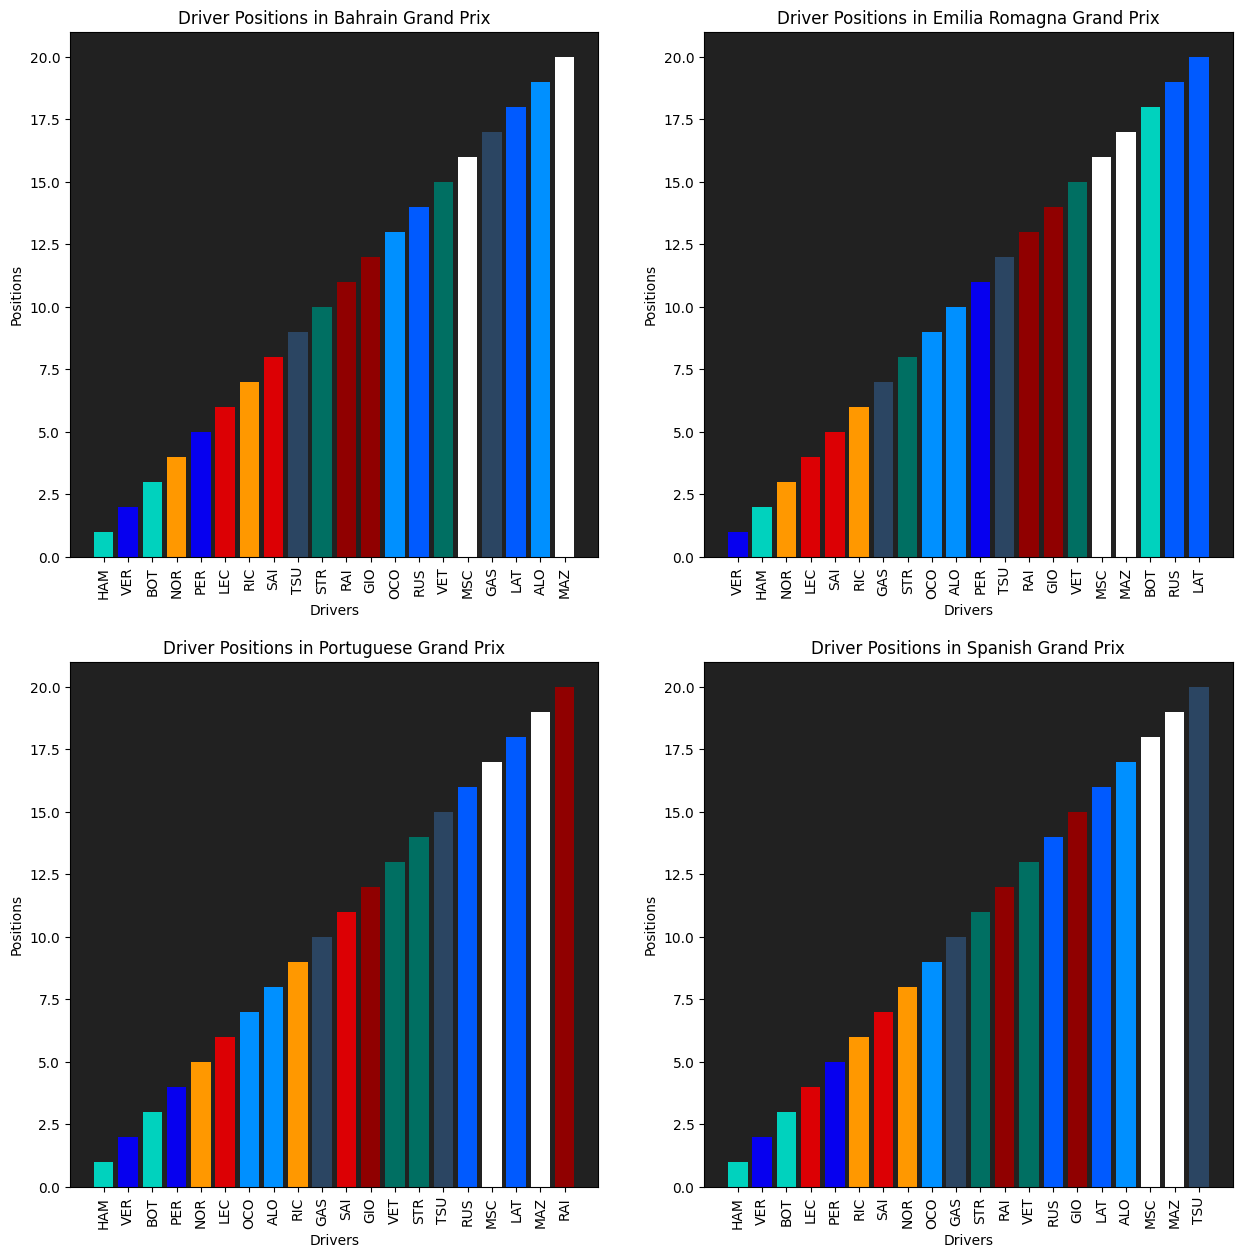

In [4]:
event_schedule = fastf1.get_event_schedule(2021, include_testing=False)

event_names = event_schedule.EventName

session = event_schedule.get_event_by_round(1).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]
 
f = plt.figure(figsize=(15, 15))

ax = f.add_subplot(2,2,1)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[1])

session = event_schedule.get_event_by_round(2).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]
 
ax = f.add_subplot(2,2,2)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[2])

session = event_schedule.get_event_by_round(3).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]
 
ax = f.add_subplot(2,2,3)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[3])

session = event_schedule.get_event_by_round(4).get_race()
session.load()
session_results = session.results
 
drivers_abbreviations = session_results.Abbreviation
team_names = session_results.TeamName
driver_fullnames = session_results.FullName
driver_positions = session_results.Position
team_colors = ['#' + c for c in session_results.TeamColor]

ax = f.add_subplot(2,2,4)
ax.bar(drivers_abbreviations, driver_positions, label=team_names, color=team_colors)
ax.set_facecolor("#212121")
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Drivers')
ax.set_ylabel('Positions')
ax.set_title('Driver Positions in ' + event_names[4])

plt.show()

#### How is car/driver performance affected by circumstantial factors?

In [7]:
event_schedule = fastf1.get_event_schedule(2021, include_testing=True)
session = event_schedule.get_event_by_round(1).get_race()
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']


In [8]:
laps = session.laps.pick_driver('VER')

filter1 = laps["Compound"]=="MEDIUM"
data1 = laps.where(filter1, inplace = False).dropna(how="all")

filter2 = laps["Compound"]=="HARD"
data2 = laps.where(filter2, inplace = False).dropna(how="all")

filter3 = laps["FreshTyre"]==False
data3 = laps.where(filter3, inplace = False).dropna(how="all")

filter4 = laps["FreshTyre"]==True
data4 = laps.where(filter4, inplace = False).dropna(how="all")

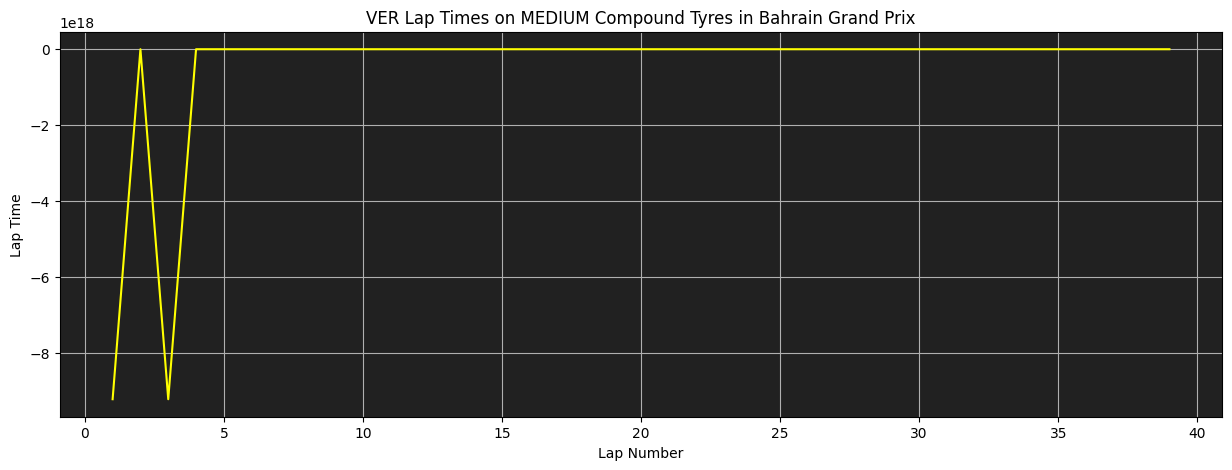

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data1["LapNumber"], data1["LapTime"], color='yellow')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on MEDIUM Compound Tyres in ' + event_names[1])
ax.grid()

plt.show()

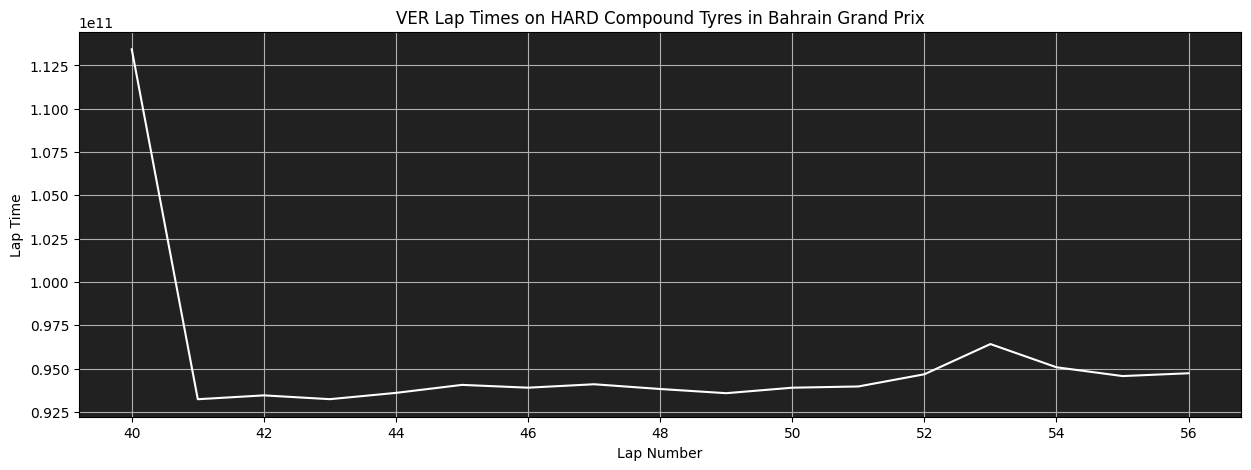

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data2["LapNumber"], data2["LapTime"], color='white')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on HARD Compound Tyres in ' + event_names[1])
ax.grid()

plt.show()

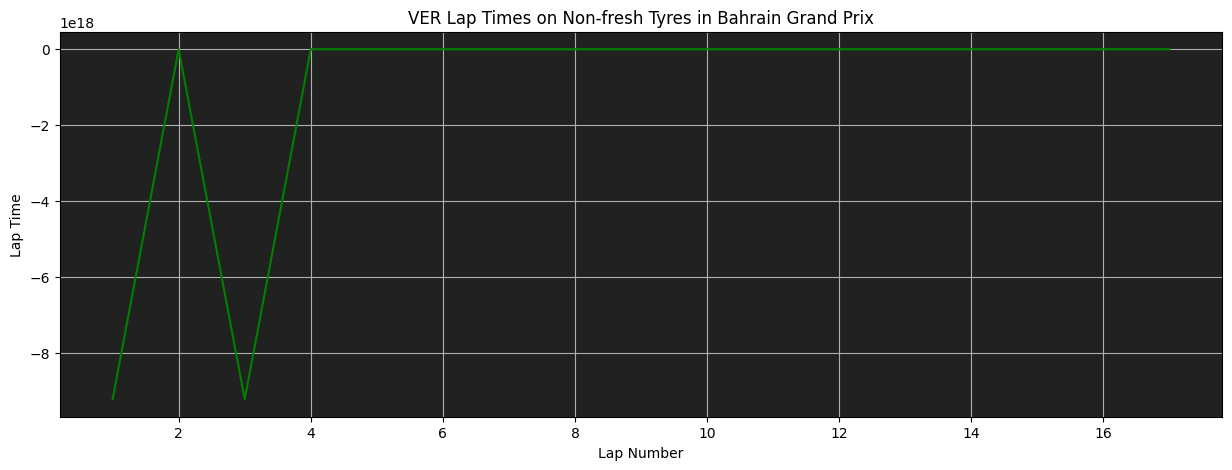

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data3["LapNumber"], data3["LapTime"], color='green')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on Non-fresh Tyres in ' + event_names[1])
ax.grid()

plt.show()

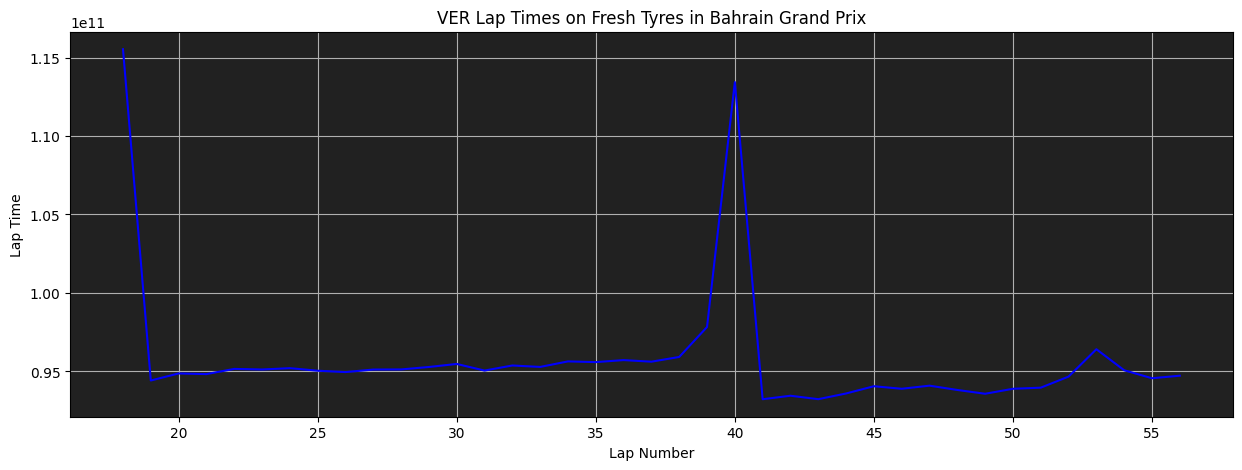

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data4["LapNumber"], data4["LapTime"], color='blue')
ax.set_facecolor("#212121")
ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title('VER Lap Times on Fresh Tyres in ' + event_names[1])
ax.grid()

plt.show()

The analysis I did was showcase the Lap Times based on the tire conditions in the Bahrain Grand Prix. Each chart compares different times with different types of tires and whether they are fresh. It also shows the starting position of each driver in the Bahrain Grand Prix and other races to visualize it better. This data can be essential for racing teams when determining what type of tires to use at different race tracks and how it can affect lap time to help save time on each race.